<style type="text/css">
table td{
border:none;
}
</style>

<table>
    <tr>
        <td width=15%><img src="../img/logoIGE_Color_Light.jpg"></img></td>
        <td>
            <center>
                <h1>Machine Learning for prediciting RX localization</h1> <br>
                May - July 2022 <br>
                IGE internship
            </center>
            Renan MANCEAUX <br>
            Supervisor :<br>
            Thomas CHAUVE
        </td>
        <td width=20%><img src="../img/logo_UGA_imag.png"></img></td>
    </tr>
</table>

<center><h1> Data Computing </h1></center>

----------------------------

<center> <h1> Compute Triple Junction coordinates and orientations of their 3 grains </h1> <center>

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
sys.path.append("../")
import utils

import xarray as xr
import xarrayaita.aita as xa
import pickle

In [2]:
file = open('../data/craft/CI02.xr', 'rb')
ds = pickle.load(file)
file.close()

In [3]:
ds['schmid']=ds.orientation.uvecs.calc_schmid(np.array([0,1,0]))

# Calculate TJ coordinates and ID of associated grains 

In [4]:
TJ = ds.aita.TJ_map() # (nbTJ x 5) matrix with columns 1 & 2 for coordinates and 3,4 & 5 for id of grains

In [5]:
ds['TJ'] = TJ

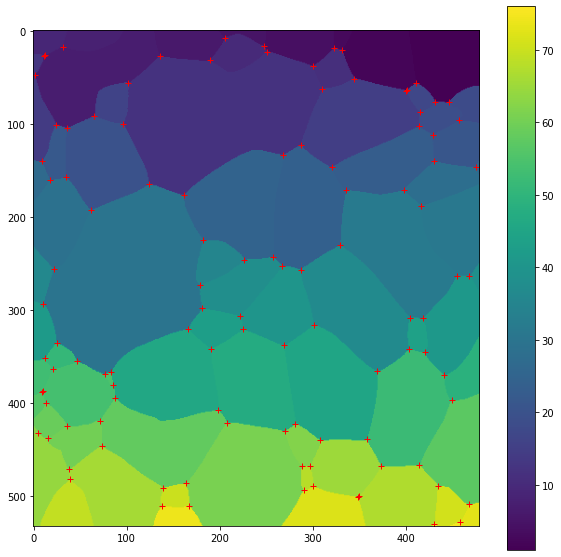

In [6]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.imshow(ds.grainId)
plt.plot(TJ.T[0],TJ.T[1],"+r")
plt.colorbar()

# Compute distance of every pixel to each TJ

In [13]:
dist = ds.aita.dist2eachTJ() # (y,x,nbTJ) array

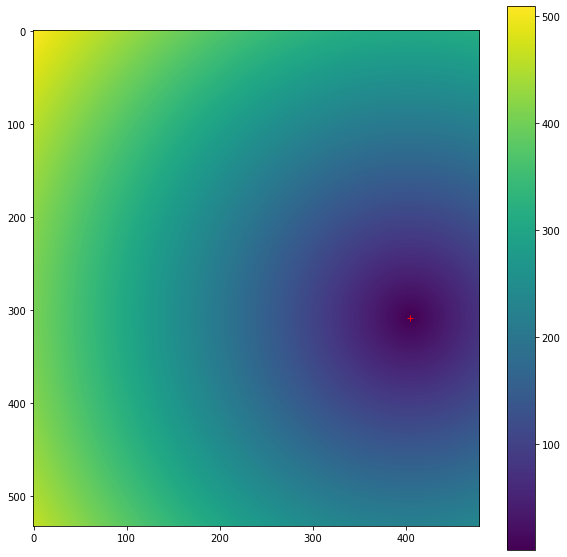

In [17]:
i = 55
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.imshow(dist[:,:,i])
plt.plot(ds.TJ.T[0,i],ds.TJ.T[1,i],"+r")
plt.colorbar()

# Compute minimum distance to TJ

In [18]:
dist2TJ2 = ds.aita.dist2TJ_labels()

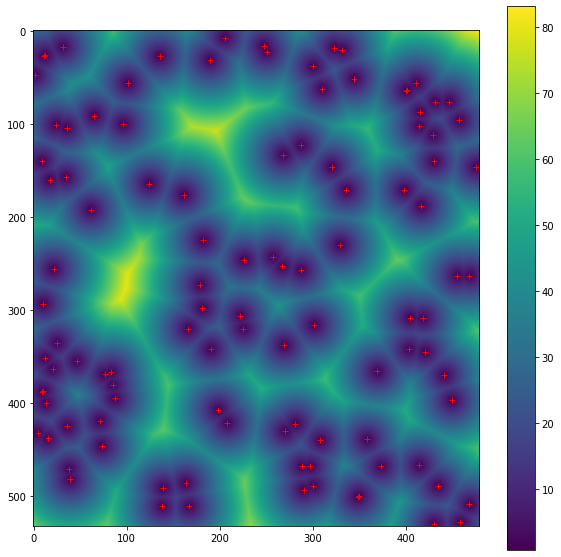

In [19]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.imshow(dist2TJ2)
plt.plot(ds.TJ.T[0],ds.TJ.T[1],"+r")
plt.colorbar()

# Computing values of schmid factor of the 3 grain of the nearest TJ

In [21]:
val_schmid3 = ds.aita.closest_outTJ_value(ds.schmid)

In [22]:
ds['val_schmid3'] = val_schmid3

(-0.075, 71.92499999999998, -0.075, 79.875)

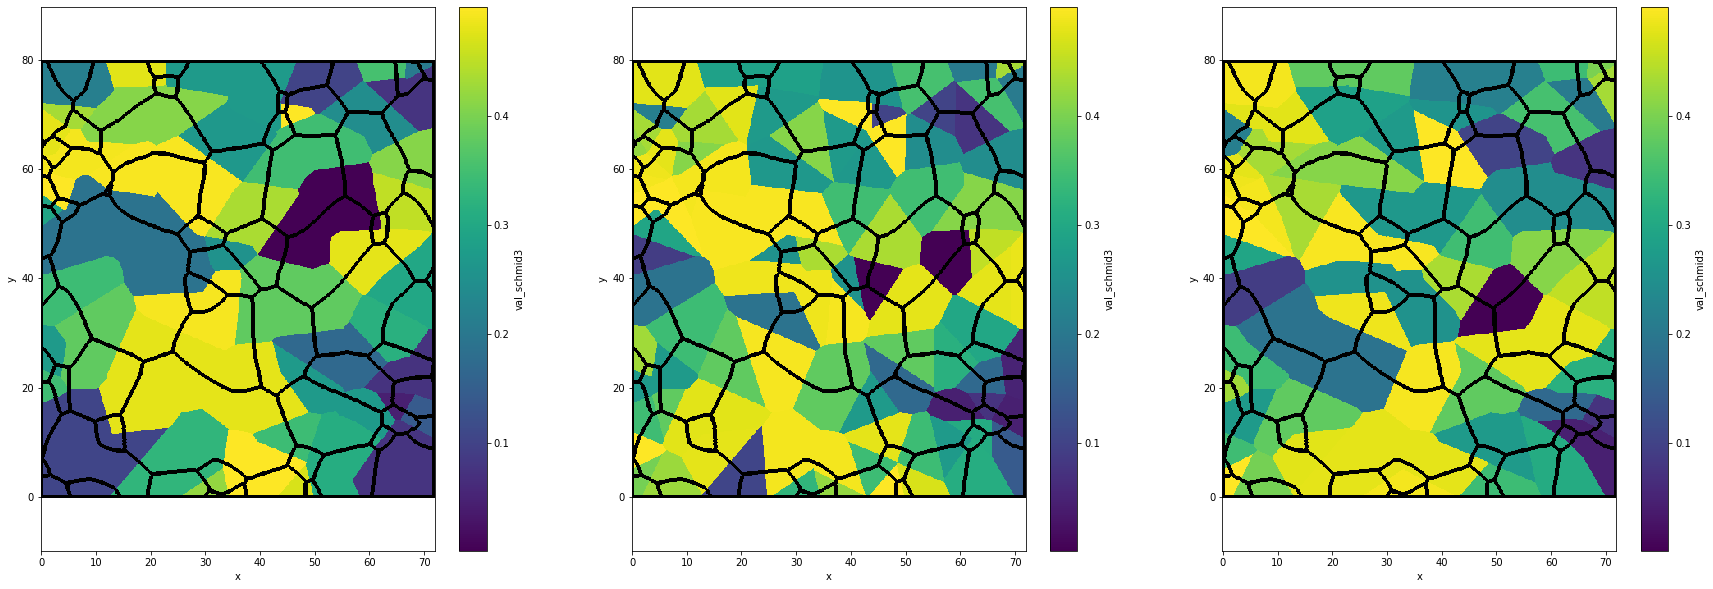

In [23]:
plt.figure(figsize=(30,10))
plt.subplot(131)
ds.val_schmid3[:,:,0].plot()
ds.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')
plt.subplot(132)
ds.val_schmid3[:,:,1].plot()
ds.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')
plt.subplot(133)
ds.val_schmid3[:,:,2].plot()
ds.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')

# Computing orientations of the 3 grain of the nearest TJ

In [24]:
val_or3 = ds.aita.closest_outTJ_value(ds.orientation) 

In [25]:
ds['val_or3'] = val_or3

(-0.075, 71.92499999999998, -0.075, 79.875)

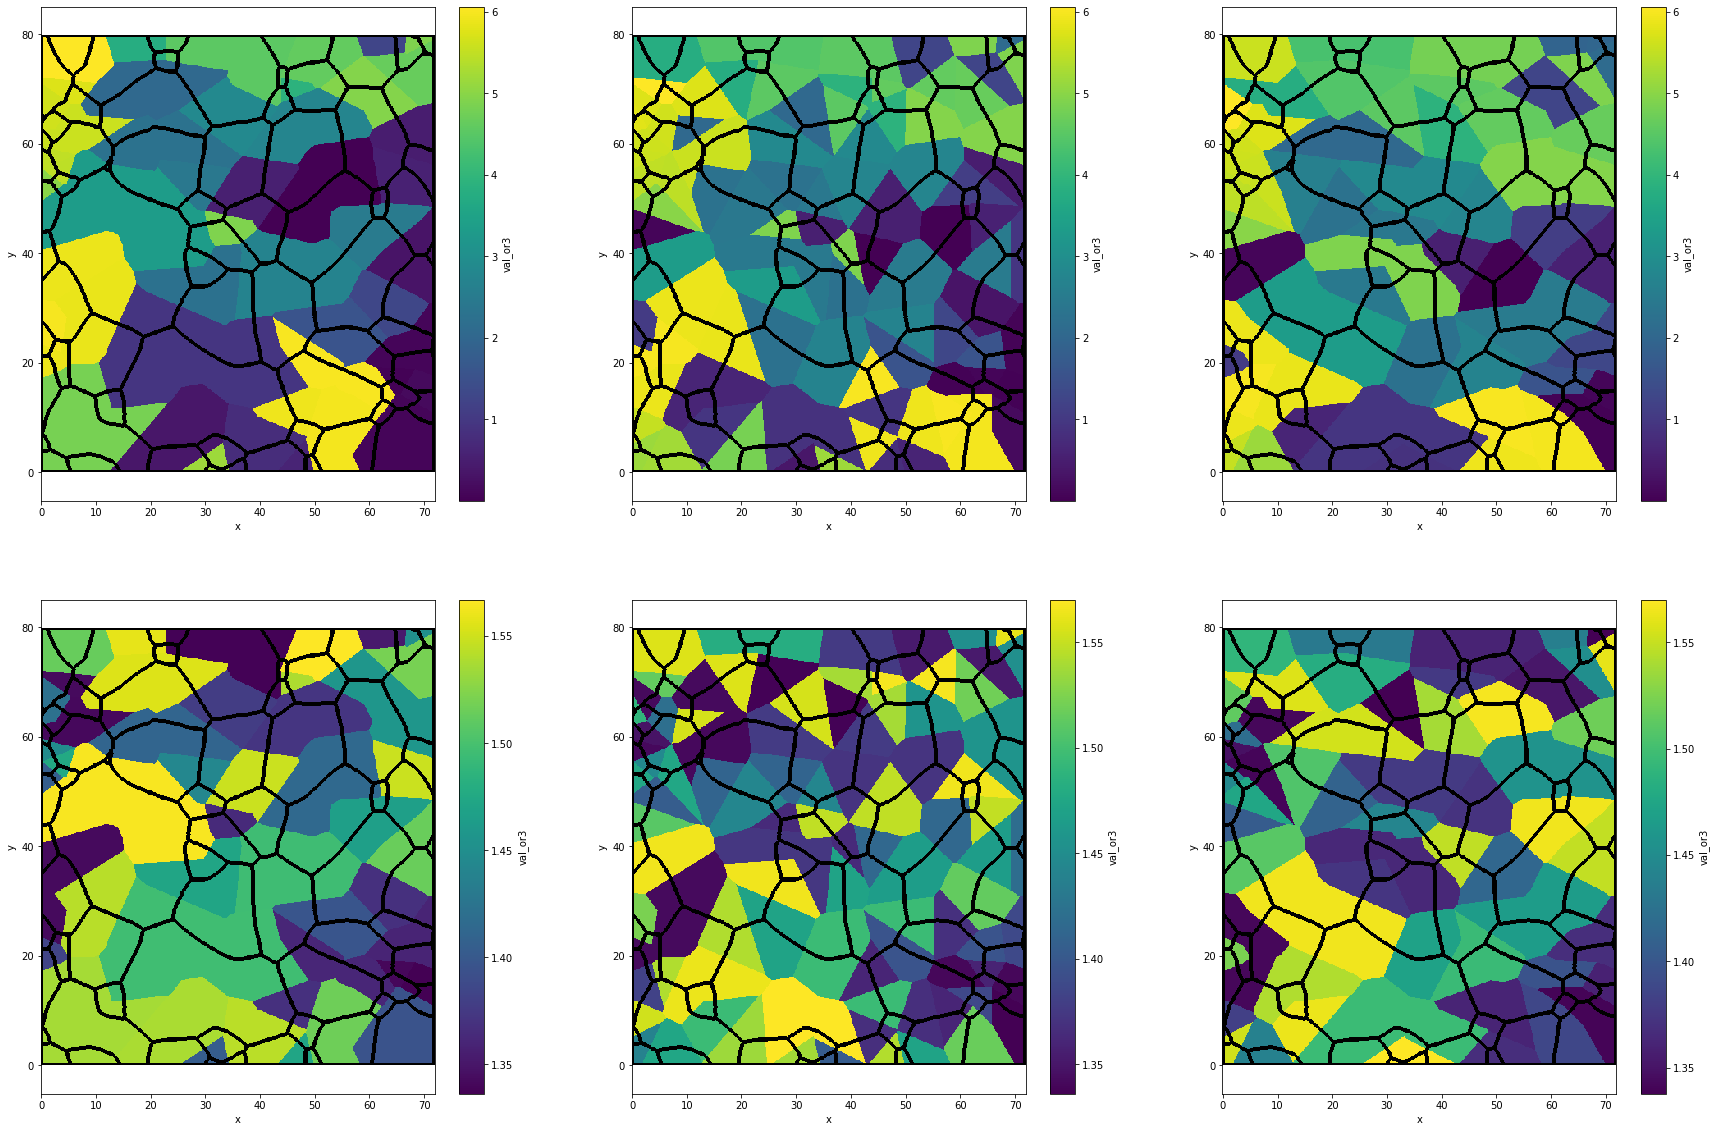

In [26]:
plt.figure(figsize=(30,20))
plt.subplot(231)
ds.val_or3[:,:,0,0].plot()
ds.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')
plt.subplot(232)
ds.val_or3[:,:,1,0].plot()
ds.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')
plt.subplot(233)
ds.val_or3[:,:,2,0].plot()
ds.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')
plt.subplot(234)
ds.val_or3[:,:,0,1].plot()
ds.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')
plt.subplot(235)
ds.val_or3[:,:,1,1].plot()
ds.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')
plt.subplot(236)
ds.val_or3[:,:,2,1].plot()
ds.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')